<p style="color:white; background:#07D url('https://www.boursedirect.fr/media/articles/aof/showroomprive-com-fait-evoluer-sa-gouvernance/divers-1702626660.jpg?width=1000') no-repeat center center fixed; background-size: cover; padding:12px; font-size:20px; font-style:italic; text-align:center; margin: 0;">
<span style="width:49%; display:inline-block; text-align:right"></span> <br><br>
<span style="font-size:30px; font-style:normal; font-weight: bold">Projet d'outils informatiques pour le traitement de données</span><br><br>
<span style="font-size:38px; font-style:normal;font-weight: bold">Prédiction boursière</span><br><br>
<span style="font-size:25px; font-style:normal;">Alexandra MILLOT et Yannick Emile Djeigo</span><br><br>
<span style="width:49%; display:inline-block; text-align:left"></span>
<span style="width:49%; display:inline-block; text-align:right">décembre 2023</span>
</p>

<p style="text-align: justify;">
    L'analyse des fluctuations des prix des actions constitue l'un des principaux domaines d'étude du trading d'algorithmes. Pour cause, la création d'un algorithme capable de prédire le cours de la bourse suscite un vif intérêt, permettant ainsi de prendre des décisions éclairées, minimisant les risques et maximisant les opportunités. Bien qu'il soit impossible de prédire avec une précision absolue les cours boursiers, le modèle de variation des prix demeure un sujet d'intérêt majeur pour de nombreux investisseurs.</p>

<p style="text-align: justify;">
    Dans le cadre de ce projet, nous allons étudier plusieurs actions françaises : LVMH, AXA, CAC 40 et Sanofi.
Ces actions ont été soigneusement choisies dans le but d'obtenir un portefeuille diversifié. Chacune d'entre elles représente un secteur différent de l'économie, offrant ainsi une variété d'opportunités et de risques. LVMH, en tant que géant du luxe, reflète le secteur de la mode et des produits de luxe, tandis qu'AXA représente le domaine de l'assurance et des services financiers. Le CAC 40, en tant qu'indice boursier flottant pondéré en fonction de la capitalisation boursière, il reflète la performance des 40 actions les plus importantes cotées sur Euronext Paris. Elle offre une perspective globale sur les performances du marché français. Enfin, Sanofi, acteur majeur dans le secteur pharmaceutique, ajoute une composante de santé à la diversification du portefeuille.</p>

<p style="text-align: justify;">
    Pour chaque action, nous entreprendrons une exploration approfondie des données boursières associées. Notre démarche consistera à étudier les différentes méthodes d'analyse du risque inhérent à ces actions. L'objectif principal de ce projet sera de mettre en place plusieurs algorithmes, capablent de prédire les cours futurs des actions étudiées, en s'appuyant sur les concepts de régression linéaire et d'apprentissage automatique, notamment les réseaux de neurones récurrent. Ce processus de développement algorithmique sera complété par une évaluation visant à déterminer l'efficacité des algorithmes ainsi créés.</p>
    
<style>
#grad1 {
  height: 200px;
  background-color: red; /* For browsers that do not support gradients */
  background-image: linear-gradient(to right, #003478 , #4C9DFF);
}
</style>

<h2 style="padding:16px; color:#FFF; background-color: red; /* For browsers that do not support gradients */
  background-image: linear-gradient(to right, #003478 , #6495ED);">Importation des librairies</h2>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from tabulate import tabulate
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler

# Import sklearn modules that will help with modeling building
!{sys.executable} -m pip install sklearn # Download sklearn 
from sklearn.metrics import mean_squared_error # Install error metrics 
from sklearn.linear_model import LinearRegression # Install linear regression model
from sklearn.neural_network import MLPRegressor # Install ANN model 
from sklearn.preprocessing import StandardScaler # to scale for ann
 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

zsh:1: parse error near `-m'


<h2 style="padding:16px; color:#FFF; background-color: red; /* For browsers that do not support gradients */
  background-image: linear-gradient(to right, #003478 , #6495ED);">Extraction et Nettoyage des Données boursières</h2>

<p style="text-align: justify;">
Démarrons en important le cours historique journalier sur une période de trois ans, du 27/11/2020 au 27/11/2023, ainsi que les données futures des six jours à venir. Nous nous concentrons  sur quatre actions vues dans l'introduction. </p>

<p style="text-align: justify;">
Afin de répondre aux critères d'évaluation du projet, nous avons employé deux approches pour importer les cours historiques journaliers. La première méthode extrait les données historiques spécifiquement pour un symbole donné. Alors que, la deuxième méthode se focalise sur l'importation des données des six jours à venir pour un ensemble de symboles.</p>

In [2]:
# Method to import historical data for a particular symbol
def import_historical_data(symbol, start_date, end_date, company_name):
    data, data['company_name'] = yf.download(symbol, start_date, end_date), company_name
    return data

# Method to import the following 6-day data for a set of symbols
def import_future_data(symbols, start_date, days):
    end_date = pd.to_datetime(start_date) + timedelta(days+2)  # Adjust end_date
    future_data = yf.download(symbols, start_date, end_date)
    return future_data

# Specify the action symbol and start date
symbols, names = ['MC.PA', 'CS.PA', '^FCHI', 'SAN.PA'], ["LVMH", "AXA", "CAC 40", "SANOFI"]
start, end = "2020-11-27", "2023-11-28"

# Import historical data for each symbol
company_list = [import_historical_data(symbol, start, end, com_name) for symbol, com_name in zip(symbols, names)]
df = pd.concat(company_list)

# Split the DataFrame into 4 to have each action separated
LVMH = df[df['company_name'] == "LVMH"]
AXA = df[df['company_name'] == "AXA"]
CAC40 = df[df['company_name'] == "CAC 40"]
SANOFI = df[df['company_name'] == "SANOFI"]

futur_data = import_future_data(symbols, end, days=6) # Import data from next 6 days

# Split the DataFrame into 4 to have each action separated
symbols = ['MC.PA', 'CS.PA', '^FCHI', 'SAN.PA']
data_f = {symbol: futur_data.xs(symbol, level=1, axis=1) for symbol in symbols}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  4 of 4 completed


<h2 style="padding:16px; color:#FFF; background-color: red; /* For browsers that do not support gradients */
  background-image: linear-gradient(to right, #003478 , #6495ED);">Exploration des données</h2>
  
Avant d'explorer en détail la notion de risque et les algorithmes de prédiction, débutons par une analyse préliminaire des données récupérées.

### • ) Statistique descriptive

In [3]:
LVMH.describe()

Open        High         Low       Close   Adj Close  \
count  772.000000  772.000000  772.000000  772.000000  772.000000   
mean   680.573964  687.902849  672.890154  680.702397  663.959810   
std     98.018921   98.396198   97.596676   97.948416  101.948817   
min    487.000000  493.100006  482.899994  482.899994  459.894318   
25%    622.825012  630.224991  614.375015  622.049988  601.093384   
50%    672.399994  678.399994  665.250000  671.750000  652.080902   
75%    729.024994  736.874985  723.050003  729.624985  713.741089   
max    894.500000  904.599976  891.599976  902.000000  887.959778   

             Volume  
count  7.720000e+02  
mean   3.952628e+05  
std    1.721364e+05  
min    4.839200e+04  
25%    2.947610e+05  
50%    3.554765e+05  
75%    4.447288e+05  
max    1.688007e+06

In [4]:
AXA.describe()

Open        High         Low       Close   Adj Close  \
count  772.000000  772.000000  772.000000  772.000000  772.000000   
mean    24.941898   25.172280   24.712517   24.947991   22.966615   
std      2.767899    2.773538    2.753486    2.757951    3.540425   
min     18.370001   18.521999   18.209999   18.299999   15.191454   
25%     22.863750   23.103750   22.665001   22.882500   20.333984   
50%     25.200001   25.492499   24.965000   25.217501   22.577384   
75%     27.376250   27.613750   27.142499   27.367500   26.401781   
max     30.155001   30.340000   29.995001   30.170000   29.389999   

             Volume  
count  7.720000e+02  
mean   5.018792e+06  
std    2.502231e+06  
min    8.029250e+05  
25%    3.483977e+06  
50%    4.496713e+06  
75%    5.656451e+06  
max    1.866006e+07

In [5]:
CAC40.describe()

Open         High          Low        Close    Adj Close  \
count   772.000000   772.000000   772.000000   772.000000   772.000000   
mean   6638.070497  6678.868995  6597.328093  6639.621816  6639.621816   
std     538.865354   536.422361   539.442115   537.383742   537.383742   
min    5392.549805  5422.100098  5306.580078  5393.339844  5393.339844   
25%    6280.750122  6319.237549  6225.979858  6271.964966  6271.964966   
50%    6646.725098  6680.155029  6613.719971  6646.409912  6646.409912   
75%    7106.029907  7154.522339  7075.477417  7113.097656  7113.097656   
max    7551.500000  7581.259766  7545.600098  7577.000000  7577.000000   

             Volume  
count  7.720000e+02  
mean   7.076558e+07  
std    3.320528e+07  
min    0.000000e+00  
25%    5.623612e+07  
50%    7.005380e+07  
75%    8.386422e+07  
max    2.430102e+08

In [6]:
SANOFI.describe()

Open        High         Low       Close   Adj Close  \
count  772.000000  772.000000  772.000000  772.000000  772.000000   
mean    89.788067   90.586649   88.989727   89.809958   85.436763   
std      7.303565    7.379069    7.239663    7.352990    8.952105   
min     74.691956   76.064461   74.512932   74.940598   67.239197   
25%     84.369812   85.265572   83.547619   84.480000   78.877438   
50%     88.418514   89.093281   87.775482   88.407028   84.288414   
75%     96.177498   97.527498   95.152502   96.490000   94.205690   
max    104.260002  106.080482  103.580002  105.642876  103.980003   

             Volume  
count  7.720000e+02  
mean   1.911097e+06  
std    9.071801e+05  
min    2.509420e+05  
25%    1.375728e+06  
50%    1.746358e+06  
75%    2.195105e+06  
max    1.109420e+07

### • ) Représentation graphique des prix de clôture des actions au fil du temps

<p style="text-align: justify;">
    Le cours de clôture est le dernier cours auquel l'action est négociée au cours de la journée de bourse habituelle. Elle est considérée comme étant la référence standard utilisée par les investisseurs pour suivre sa performance au fil du temps.
</p>

In [7]:
df_reset = df.reset_index() # Reset the index to use the default numeric index
figures = [] # List to store individual figures

# Plot historical data for each company separately
for company_df in [LVMH, AXA, CAC40, SANOFI]:
    fig = px.line(company_df.reset_index(), y = company_df['Close'], color_discrete_sequence = ['#C064FC'], x = company_df.index, title = f'Cours boursiers historiques - {company_df["company_name"].iloc[0]}')
    fig.update_layout(xaxis_rangeslider_visible = True, plot_bgcolor='#F4F4F4', xaxis_title = 'Date', yaxis_title = 'Prix de clôture')
    figures.append(fig)

for fig in figures:
    fig.show()

### • )  Représentation graphique du volume des ventes des actions au fil du temps

<p style="text-align: justify;">
    Le volume dans le contexte financier représente la quantité d'un actif ou d'un titre qui a été échangée sur le marché pendant une période donnée, souvent au cours d'une journée. Prenons l'exemple du volume des transactions boursières, qui se réfère au nombre d'actions d'un titre négociées entre son ouverture et sa clôture au cours d'une journée spécifique.
</p>

<p style="text-align: justify;">
    L'étude du volume des ventes enrichit l'analyse des données financières en offrant des perspectives sur la confirmation des tendances, la liquidité d'une action ou encore la prévision de l'intérêt du marché.
</p>

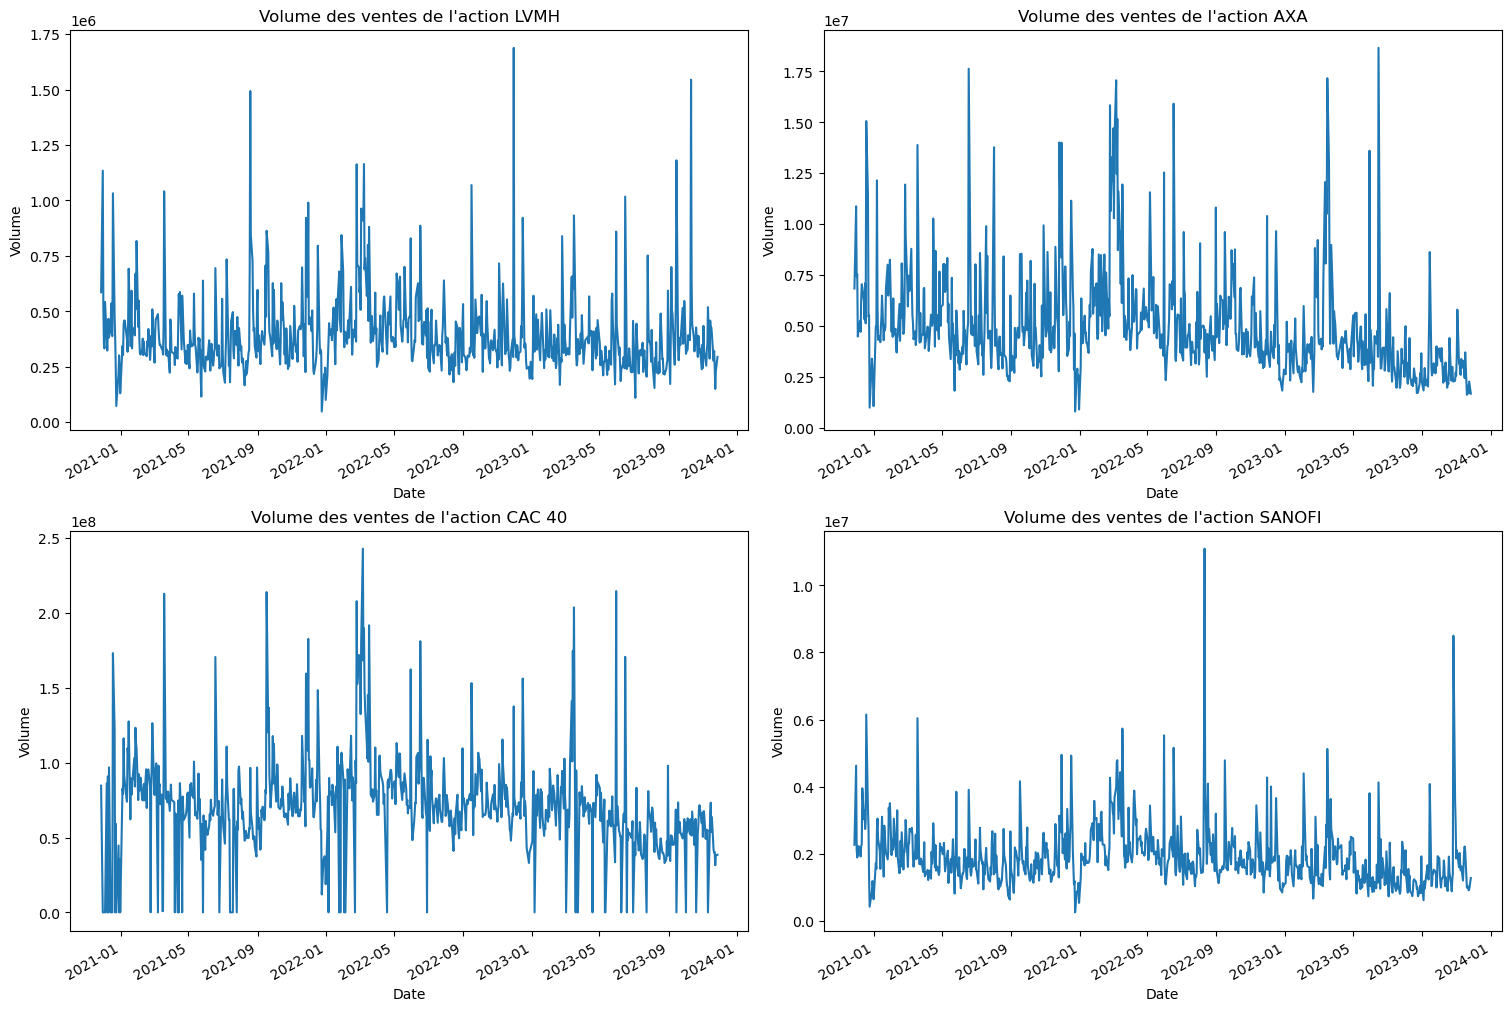

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), constrained_layout=True)

for (ax, company) in zip(axes.flat, company_list):
    company['Volume'].plot(ax=ax)
    ax.set_title(f"Volume des ventes de l'action {company['company_name'].iloc[0]}")
    ax.set_ylabel('Volume')

plt.show()

<p style="text-align: justify;">
    Maintenant que nous avons vu les visualisations du cours de clôture et du volume négocié chaque jour, commençons par calculer la moyenne mobile du titre.
</p>

### • )  Calcul de la moyenne mobile

<p style="text-align: justify;">
    La moyenne mobile (MA) est un outil d'analyse technique simple qui lisse les données de prix en créant un prix moyen constamment mis à jour. La moyenne est prise sur une période de temps spécifique, comme ici, 10 jours, 20 jours et 50 jours. La moyenne mobile, en tant qu'indicateur de lissage, permet aux traders et aux investisseurs de prendre des décisions éclairées en minimisant l'impact des fluctuations à court terme et en se concentrant sur la direction générale des prix.
</p>

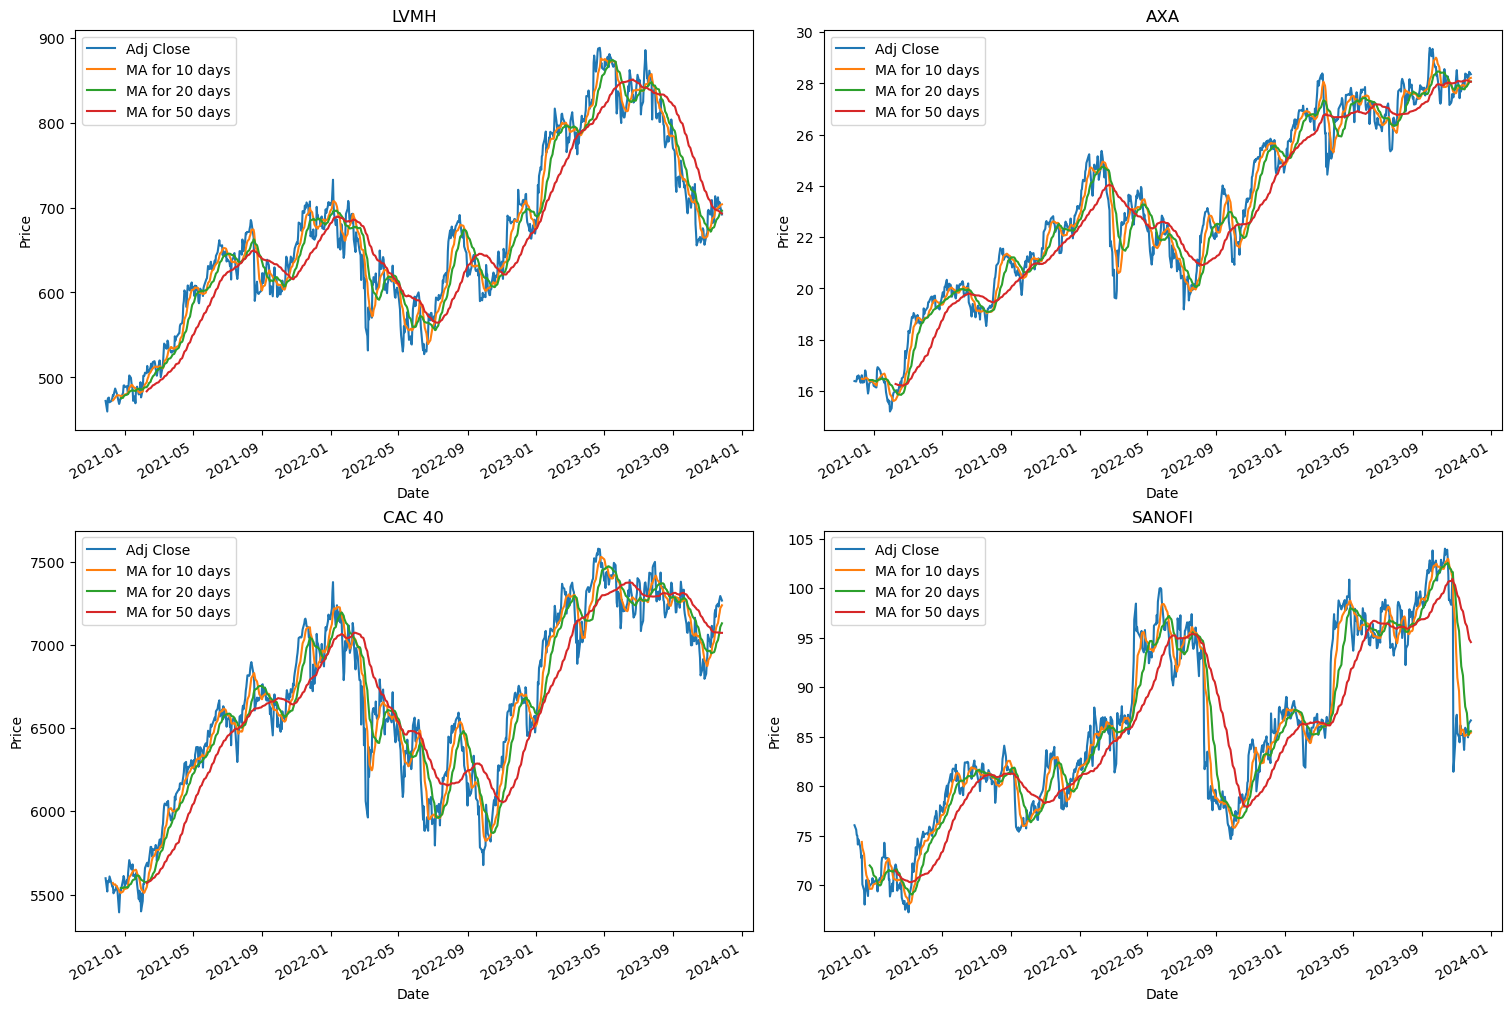

In [9]:
ma_days = [10, 20, 50]

# Calculate moving averages for each company
for ma in ma_days:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Create the graphics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), constrained_layout=True)

for (ax, company, company_name) in zip(axes.flat, company_list, ["LVMH", "AXA", "CAC 40", "SANOFI"]):
    columns_to_plot = ['Adj Close'] + [f"MA for {ma} days" for ma in ma_days]
    company[columns_to_plot].plot(ax=ax)
    ax.set_title(f'{company_name}')
    ax.set_ylabel('Price')
    ax.set_xlabel('Date')

plt.show()

<p style="text-align: justify;">
    Sur les graphiques, il est observé que les périodes de 10 et 20 jours se révèlent être les valeurs optimales pour calculer la moyenne mobile. En optant pour ces périodes plus courtes, nous parvenons à saisir de manière plus précise les tendances des données, tout en limitant l'inclusion de bruit indésirable. En revanche, la moyenne mobile sur 50 jours tend à être moins réactive aux fluctuations à court terme, ce qui peut résulter en une certaine perte de sensibilité dans la détection des variations immédiates des cours.
</p>

<h2 style="padding:16px; color:#FFF; background-color: red; /* For browsers that do not support gradients */
  background-image: linear-gradient(to right, #003478 , #6495ED);">Évaluation du risque et de la performance</h2>

<p style="text-align: justify;">
    Maintenant que nous avons fait une analyse du cours historique journalier de chaque action, il est intéressant avant deffectuer les prédictions de pouvoir évaluer la performance de chacune d'entre elle ainsi que le risque qui lui est associé.
</p>

<p style="text-align: justify;">
    Pour analyser la performance d'une action, nous allons scrutiner attentivement les fluctuations quotidiennes du cours de l'action, ainsi que la corrélation entre les clôtures des différentes actions. En ce qui concerne l'évaluation du risque associé à une action, notre attention se portera spécifiquement sur le risque de baisse.
</p>

## Évaluation de la performance

### Rendement quotidien du titre en moyenne

<p style="text-align: justify;">
    Calculer le rendemet quotidien du titre en moyenne permet aux investisseurs d'évaluer la performance moyenne d'un titre sur une période donnée.
</p>

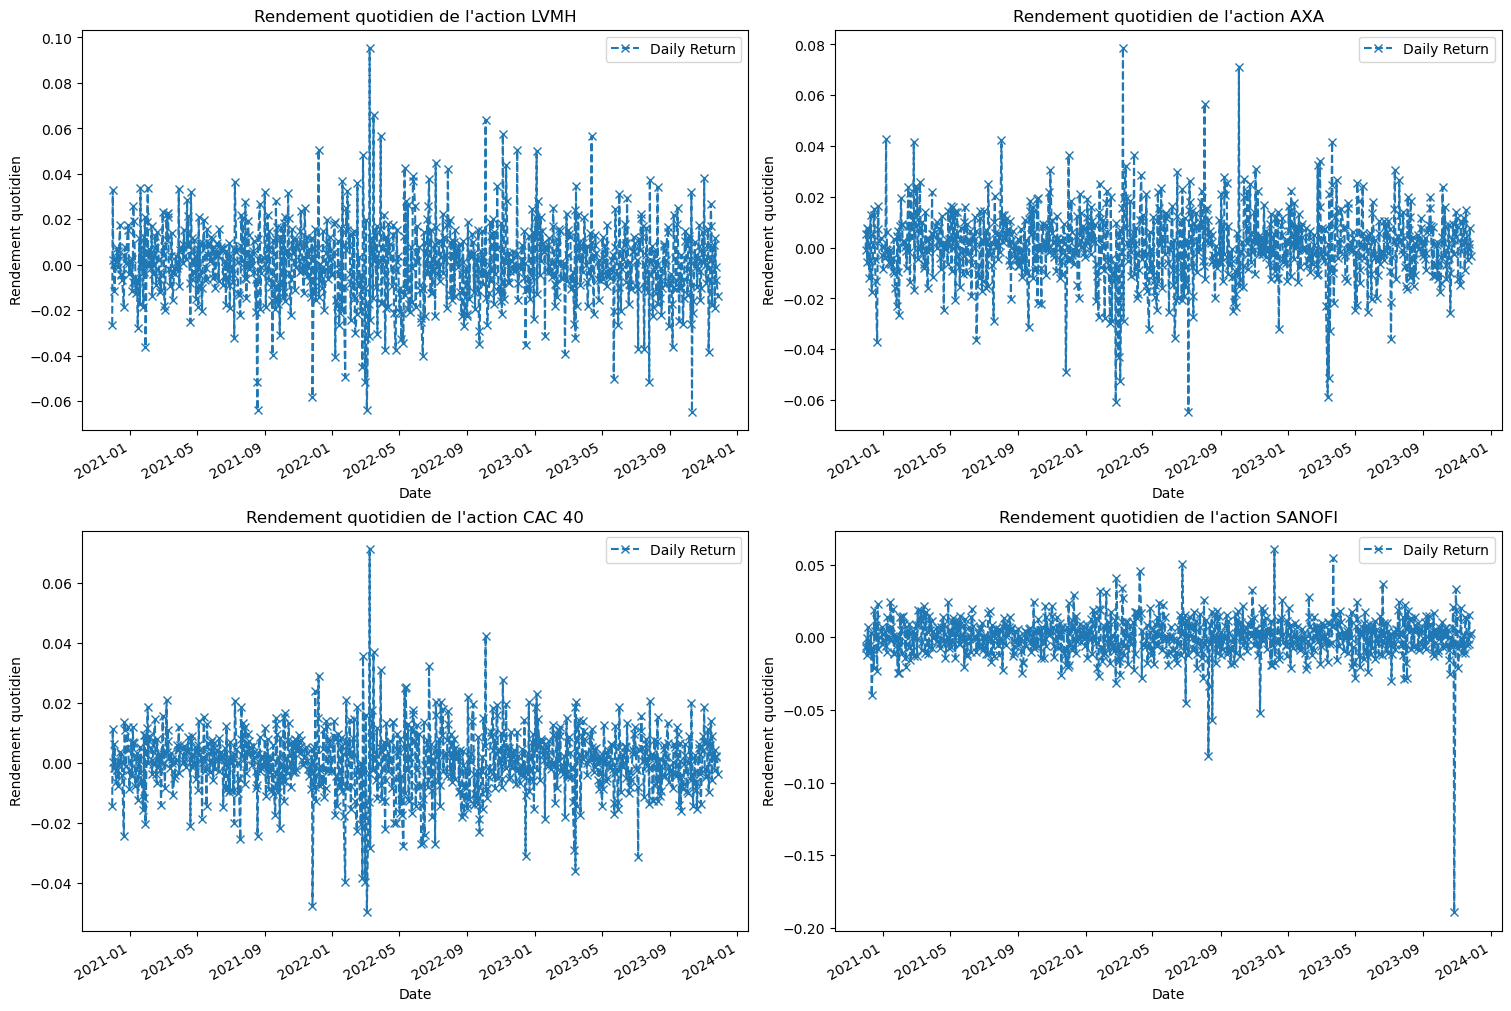

In [10]:
# Calculate daily return for each stock
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# View daily performance charts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), constrained_layout=True)

for (ax, company, company_name) in zip(axes.flat, company_list, ["LVMH", "AXA", "CAC 40", "SANOFI"]):
    company['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='x')
    ax.set_title(f"Rendement quotidien de l'action {company_name}")
    ax.set_ylabel('Rendement quotidien')
    ax.set_xlabel('Date')

plt.show()

<p style="text-align: justify;">
    Très bien, examinons maintenant le rendement quotidien moyen à l'aide d'un histogramme réaliser avec Seaborn.
</p>

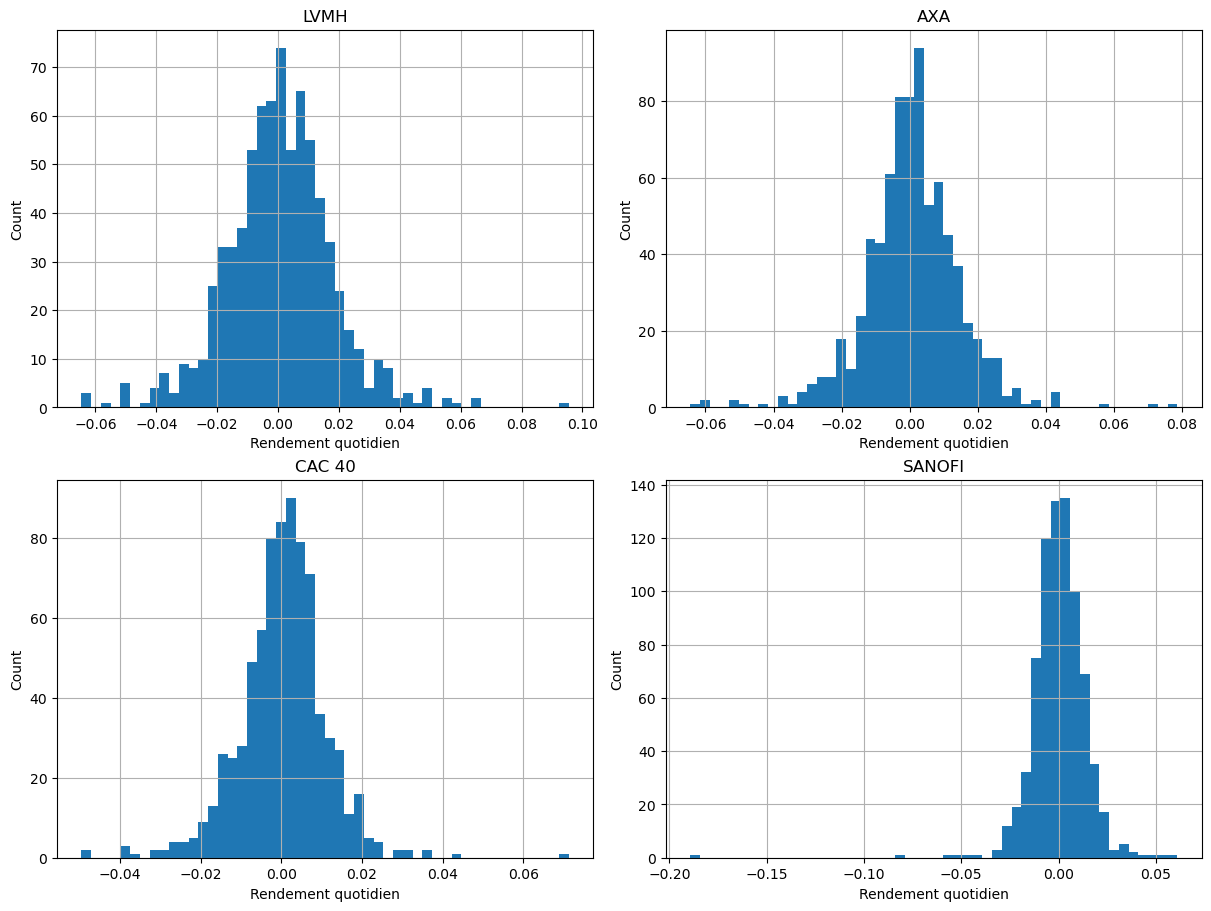

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9), constrained_layout=True)

for (ax, company, company_name) in zip(axes.flat, company_list, ["LVMH", "AXA", "CAC 40", "SANOFI"]):
    company['Daily Return'].hist(bins=50, ax=ax)
    ax.set_xlabel('Rendement quotidien')
    ax.set_ylabel('Count')
    ax.set_title(f'{company_name}')

plt.show()

### Étude de la corrélation entre les cours de clôture des différentes actions

<p style="text-align: justify;">
     Si notre intention est d'analyser les rendements de toutes les actions répertoriées, procédons à la construction d'un DataFrame englobant toutes les colonnes ['Close'] de chacune des séries temporelles boursières.
</p>

In [12]:
def get_tech_returns(stock_list, start_date, end_date):
    tech_data = yf.download(stock_list, start=start_date, end=end_date)['Adj Close'] # Retrieve historical closing adjusted price data
    tech_rets = tech_data.pct_change() # Create a Percentage Yields DataFrame
    return tech_rets

adjusted_start = "2020-11-26" # Adjust the departure date to 2020-11-26 so as to obtain the return on the start date of 2020-11-27

tech_returns = get_tech_returns(symbols, adjusted_start, end) # Use the function to get tech stock returns
tech_returns = tech_returns.rename(columns={'CS.PA': 'LVMH', 'MC.PA': 'AXA', '^FCHI': 'CAC 40', 'SAN.PA': 'SANOFI'})
tech_returns = tech_returns.drop(tech_returns.index[0]) # Delete the first row of the tech_returns DataFrame

tech_returns.head() # Displays the first rows of the Yields DataFrame

[*********************100%%**********************]  4 of 4 completed


LVMH       AXA    SANOFI    CAC 40
Date                                              
2020-11-27 -0.002830  0.000504 -0.001874  0.005639
2020-11-30 -0.001014 -0.026411 -0.005868 -0.014224
2020-12-01  0.005276  0.032959 -0.007201  0.011432
2020-12-02  0.007671  0.002214 -0.000713  0.000245
2020-12-03 -0.005609  0.000301 -0.012018 -0.001549

<p style="text-align: justify;">
    Nous pouvons maintenant voir que si deux actions sont parfaitement (et positivement) corrélées entre elles, une relation linéaire entre leurs valeurs de rendement quotidien devrait se produire.
</p>

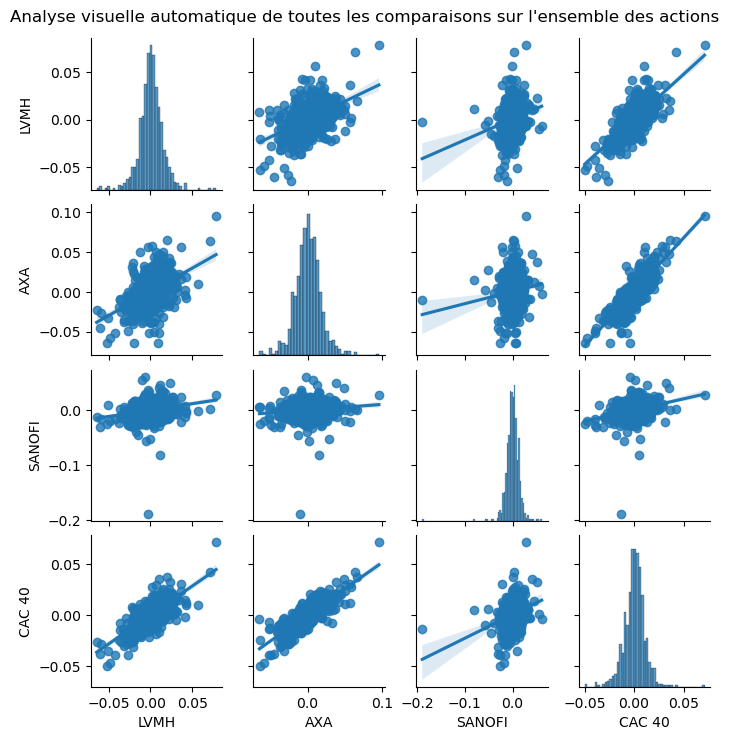

In [13]:
pairplot = sns.pairplot(tech_returns, kind='reg', height=1.8)
pairplot.fig.suptitle("Analyse visuelle automatique de toutes les comparaisons sur l'ensemble des actions", y=1.02)

plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


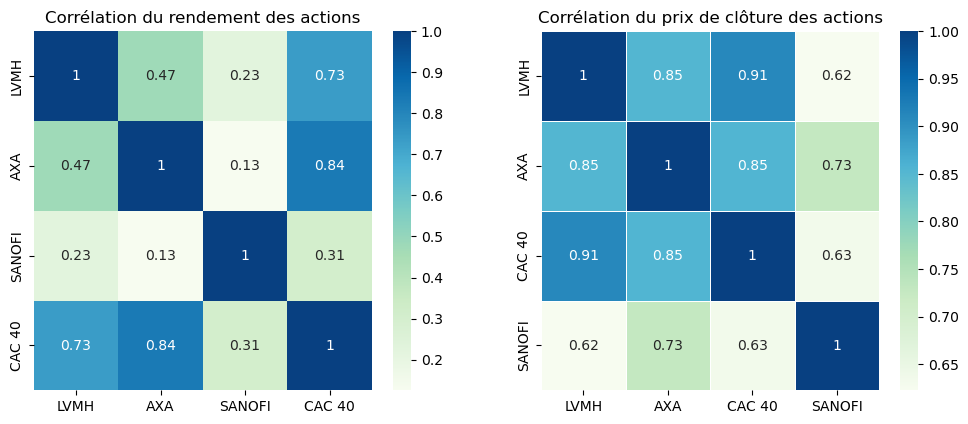

In [14]:
action_list = []  # Initialize a list to store the DataFrames of each action

# Retrieve historical data for each symbol and add them to the list
for symbol, com_name in zip(symbols, names):
    data = yf.download(symbol, start, end)['Adj Close'].rename(com_name)
    action_list.append(data)

closing_df = pd.concat(action_list, axis=1)  # Concatenate data to create a single DataFrame

correlation_matrix = closing_df.corr()  # Create a correlation matrix
plt.figure(figsize=(12, 10))

# Stock Return Correlation
plt.subplot(2, 2, 1)
sns.heatmap(tech_returns.corr(), annot=True, cmap='GnBu')
plt.title('Corrélation du rendement des actions')

# Stock Closing Price Correlation
plt.subplot(2, 2, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', linewidths=.5)
plt.title("Corrélation du prix de clôture des actions")

plt.subplots_adjust(top=0.9)  # Adjust the space between the main title and subtitles
plt.show()  # Show matrices


<p style="text-align: justify;">
    On remarque que dans la matrice de corrélation du rendement des actions le CAC 40 est fortement corrélé avec Axa et LVMH. De plus la corrélation entre le CAC 40 et Axa est aussi présente sur le prix de clôture des actions.
</p>

## Évaluation du risque 

### Le risque de baisse

<p style="text-align: justify;">
    Le risque de baisse représente le risque financier lié à la possibilité de subir des pertes. Les investisseurs cherchent à évaluer la perte potentielle de la valeur de leurs actifs en raison de la volatilité des conditions du marché. Nous allons ici, mesurer le risque de baisse de deux manières différentes : La Valeur à Risque (VaR) et La Valeur à Risque Conditionnelle (CVaR).
</p>

<p style="text-align: justify;">
    La valeur à risque (VaR) établit un seuil au-delà duquel une perte ne devrait pas excéder un certain niveau. Ce seuil est toujours accompagné d'un niveau de confiance exprimé à travers des quantiles tels que 95, 99 et 99,9.
</p>

<p style="text-align: justify;">
    D'un autre côté, la valeur à risque conditionnelle (CVaR) représente une estimation des pertes prévues dans les scénarios les plus défavorables. Similaire à la VaR, la CVaR est également définie en fonction de quantiles tels que 90, 95 ou 99.
</p>

In [15]:
# Calculate daily returns for each stock
for company_df, company_name in zip([LVMH.copy(), AXA.copy(), CAC40.copy(), SANOFI.copy()], ["LVMH", "AXA", "CAC 40", "SANOFI"]):
    if 'Adj Close' in company_df.columns:  # Check if column 'Adj Close' exists
        company_df['Daily Return'] = company_df['Adj Close'].pct_change()  # Calculate daily returns
        company_df.dropna(subset=['Daily Return'], inplace=True)  # Remove rows with missing values
        daily_return_copy = company_df['Daily Return'].copy()  # Create a copy of the 'Daily Return' column
        daily_return_copy.sort_values(inplace=True, ascending=True)  # Sort yields

        # Calculate quantiles
        VaR_90 = daily_return_copy.quantile(0.1)
        VaR_95 = daily_return_copy.quantile(0.05)
        VaR_99 = daily_return_copy.quantile(0.01)

        # Calculate Conditional Value at Risk (CVaR)
        CVaR_90 = daily_return_copy[daily_return_copy <= VaR_90].mean()
        CVaR_95 = daily_return_copy[daily_return_copy <= VaR_95].mean()
        CVaR_99 = daily_return_copy[daily_return_copy <= VaR_99].mean()

        # Show the results
        print(f"\n{company_name} - Quantiles de valeur à risque (VaR) et de valeur à risque conditionnelle (CVaR):")
        print(tabulate([
            ['90%', VaR_90, CVaR_90],
            ['95%', VaR_95, CVaR_95],
            ['99%', VaR_99, CVaR_99]
        ], headers=['Niveau de confiance', 'Valeur à risque (VaR)', 'Valeur à risque conditionnelle (CVaR)']))
    else:
        print(f"\n{company_name} - La colonne 'Adj Close' n'est pas présente dans le DataFrame.")



LVMH - Quantiles de valeur à risque (VaR) et de valeur à risque conditionnelle (CVaR):
Niveau de confiance      Valeur à risque (VaR)    Valeur à risque conditionnelle (CVaR)
---------------------  -----------------------  ---------------------------------------
90%                                 -0.0195658                               -0.0307298
95%                                 -0.0264234                               -0.0390032
99%                                 -0.0495689                               -0.0569454

AXA - Quantiles de valeur à risque (VaR) et de valeur à risque conditionnelle (CVaR):
Niveau de confiance      Valeur à risque (VaR)    Valeur à risque conditionnelle (CVaR)
---------------------  -----------------------  ---------------------------------------
90%                                 -0.0145603                               -0.0248672
95%                                 -0.0210752                               -0.0321271
99%                              

<p style="text-align: justify;">
    Les résultats révèlent qu'à un niveau de confiance de 95%, la valeur à risque (VaR) pour LVMH est de -0,0264. Cette mesure indique avec 95% de confiance que la perte quotidienne ne devrait pas excéder -2,64%. Nous apprenons également que la perte de l'investissement de cette action ne dépassera pas -4,96 % avec une certitude de 99 % sur la base de la valeur historique au cours des trois dernières années. 
</p>

<p style="text-align: justify;">
    Ce raisonnement est appliqué de manière similaire à chaque action analysée, autant pour la VaR et la CVaR. Par exemple, nous pouvons voir que la CVaR de SANOFI peut atteindre -6,62 % à un niveau de confiance de 99 % sur la base des données historiques des trois dernières années.
</p>

<h2 style="padding:16px; color:#FFF; background-color: red; /* For browsers that do not support gradients */
  background-image: linear-gradient(to right, #003478 , #6495ED);">Prédire le cours de clôture des actions</h2>

## Partie 1 : Introduction et choix des modèles

<p style="text-align: justify;">
    Nous allons maintenant rentrer dans le coeur du sujet. Dans cette section, nous élaborerons deux modèles de prédiction dans le but d'anticiper les variations du marché boursier, spécifiquement en estimant les cours de clôture des prochains jours. Le premier modèle sera une régression linéaire, tandis que le second sera plus complexe, faisant appel à un algorithme de réseaux de neurones artificiels. L'objectif de ces modèles est de se rapprocher au maximum des valeurs réelles à venir.
</p>

<p style="text-align: justify;">
    Les performances des modèles peuvent varier en fonction des données disponibles, des caractéristiques du marché financier et des périodes prises en compte. C'est pour cela que nous nous sommes intéressés à plusieurs actions de secteurs différents. La période d'entraînement des modèles est de 3 ans, ce qui nous a semblé ni trop long ni trop court.
</p>

<p style="text-align: justify;">
    Maintenant, expliquons d'avantage les principes sur lesquelles sont fait nos algorithmes de prédicion :
</p>
    
- **La régression linéaire (lr)** est une méthode de modélisation statistique qui vise à établir une relation linéaire entre une variable dépendante et une ou plusieurs variables indépendantes. Dans le contexte de la prédiction d'une action, la variable dépendante serait le cours de clôture de l'action que l'on souhaite anticiper. Pour ce faire, on utilisera directement l'importation du modèle venant de la bibliothèque sklearn.linear_model.

<p style="text-align: justify;">
    Le deuxième modèle repose sur l'apprentissage automatique, une branche de la science des données qui crée des algorithmes intelligents pour les prédictions. Il apprend à ajuster ses paramètres en analysant les données passées.
</p>

- **Les réseaux de neurones artificiels (Rna)**, une forme populaire d'apprentissage automatique et souvent appelés intelligence artificielle. Inspirés par les neurones biologiques du cerveau humain, ces réseaux sont composés de millions de "décideurs" interconnectés. Ces réseaux passent par plusieurs couches, utilisent des fonctions d'activation pour pondérer les entrées et produisent une sortie pour la prédiction. Pour ce faire, on utilisera directement l'importation du modèle venant de la bibliothèque sklearn.neural_network

## Partie 2 : Création des modèles

Au sein de cette section, nous allons procéder à la mise en œuvre des deux modèles sélectionnés.

<p style="text-align: justify;">
    Commençons par définir certains paramètres clés pour anticiper les mouvements boursiers grâce à des modèles d'apprentissage automatique. Initialement, déterminons la portée temporelle de nos prévisions, se limitant aux 6 premiers jours. Ainsi que la proportion de données destinées à l'entraînement par rapport à celles réservées à l'évaluation du modèle, optant pour un démarrage raisonnable de 75%.
</p>

In [16]:
shifts = list(range(1, 7)) # Set days out to predict 
train_pct = .75 # Set a training percentage
w, h = 16, 4 # Plotting dimensions : width, height

#### Définir des fonctions

<p style="text-align: justify;">
    La fonction "CreateLags" a pour objectif de générer des décalages dans les données temporelles des cours de clôture. Ces décalages sont utiles pour saisir les tendances temporelles et sont souvent utilisés dans les modèles de prévision financière.
</p>

In [17]:
def CreateLags(df, lag_size):
    # inputs: dataframe , size of the lag (int)
    # output: dataframe ( with extra lag column), shift size (int)

    # Exclude non-numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]

    # add lag
    shiftdays = lag_size
    shift = -shiftdays
    df_numeric['Close_lag'] = df_numeric['Close'].shift(shift)

    return df_numeric, shift

<p style="text-align: justify;">
    La fonction "SplitData" a pour but de diviser les données historiques en ensembles distincts d'entraînement et de test, tout en extrayant les caractéristiques (x) et les cibles (y) pour chaque ensemble.
</p>

In [18]:
def SplitData(df, data_future, shift):
    # inputs: dataframe , training_pct (float between 0 and 1), size of the lag (int)
    # ouptut: x train dataframe, y train data frame, x test dataframe, y test dataframe, train data frame, test dataframe
    
    train = df
    test = data_future

    x_train = train.iloc[:shift,1:-1]
    y_train = train['Close_lag'][:shift]
    x_test = test.iloc[:,1:-1]
    y_test = test['Close'][:]

    return x_train, y_train, x_test, y_test, train, test

Nous sommes prêts à élaborer les définitions des deux modèles, LinearRegression_fnc et ANN_func, à présent :

In [19]:
def LinearRegression_fnc(x_train,y_train, x_test, y_test):
  #inputs: x train data, y train data, x test data, y test data (all dataframe's)
  # output: the predicted values for the test data (list)
  
  lr = LinearRegression()
  lr.fit(x_train,y_train)
  lr_pred = lr.predict(x_test)
  lr_MSE = mean_squared_error(y_test, lr_pred)
  lr_R2 = lr.score(x_test, y_test)
  print('Le coefficient de détermination (R2) : {}'.format(lr_R2))
  print("L'erreur quadratique moyenne (MSE): {}".format(lr_MSE))

  return lr_pred

In [20]:
def ANN_func(x_train,y_train, x_test, y_test):

  # Scaling data
  scaler = StandardScaler()
  scaler.fit(x_train)
  x_train_scaled = scaler.transform(x_train)
  x_test_scaled = scaler.transform(x_test)


  MLP = MLPRegressor(random_state=1, max_iter=1000, hidden_layer_sizes = (100,), activation = 'identity',learning_rate = 'adaptive').fit(x_train_scaled, y_train)
  MLP_pred = MLP.predict(x_test_scaled)
  MLP_MSE = mean_squared_error(y_test, MLP_pred)
  MLP_R2 = MLP.score(x_test_scaled, y_test)

  print('Le coefficient de détermination (R2) : {}'.format(MLP_R2))
  print("L'erreur quadratique moyenne (MSE): {}".format(MLP_MSE))

  return MLP_pred

<p style="text-align: justify;">
    La meilleure façon de comprendre la qualité de nos prévisions est de les voir et de les comparer. Pour ce faire, nous réaliserons une visualisation de série chronologique. Ce visuel comparera les valeurs prédites aux valeurs réelles.
</p>

In [21]:
def PlotModelResults_Plotly(train, test, pred, name, w, h, shift_days, model_name):
    # inputs: train dataframe, test dataframe, predicted value (list), name ('string'), width (int), height (int), shift size (int), model name (string)
    # output: None

    # Create lines of the training actual, testing actual, prediction
    D1 = go.Scatter(x=train.index, y=train['Close'], name='Cours antérieurs', line={'color': '#1E85DD'})  # Training actuals
    D2 = go.Scatter(x=test.index[:shift_days], y=test['Close'], name='Cours futurs réels')  # Testing actuals
    D3 = go.Scatter(x=test.index[:shift_days], y=pred, name='Prédiction', line={'color': '#46B25D'})  # Testing predction

    # Combine in an object
    line = {'data': [D1, D2, D3],
            'layout': {
                'xaxis': {'title': 'Date'},
                'yaxis': {'title': 'Prix de clôture (en €)'},
                'plot_bgcolor': '#F4F4F4',
                'title': name + ' - ' + model_name
            }}
    fig = go.Figure(line) # Send object to a figure
    fig.show()

## Partie 3 : Présentation des résultats des modèles


### Exécution des modèles par la méthode 2 :


In [22]:
start_date, end_date = "2020-11-27", "2023-11-27"  # Adjust end_date to 22 novembre
future_days = 6  # Adjust to 6 days

# Go through each action
for symbol, name in zip(symbols, names):
    print(f"Predictions de {name}:")
    print('------------')
    
    company_data = df[df['company_name'] == name] # Filter historical data for the current action

    for j in shifts: 
        print(f"Jour {j} prédiction:")
        print('------------')
        
        all_predictions_lr, all_predictions_mlp = [], []
        
        # Adjust the end date for future_data to correspond to the correct prediction period
        future_data_end_date = pd.to_datetime(end_date) + timedelta(days=j)
        data_future = data_f[symbol]

        # Create lags and correct column types
        df_lag, shift = CreateLags(company_data, j)
        data_future_lag, shift = CreateLags(data_future, j)
        
        x_train, y_train, x_test, y_test, train, test = SplitData(df_lag, data_future_lag, shift) # Split data
        
        # Linear Regression
        print("Régression linéaire")
        lr_pred = LinearRegression_fnc(x_train, y_train, x_test, y_test)
        all_predictions_lr.append(lr_pred)

        # Artificial Neural Network
        print("Réseau de neurones artificiels")
        MLP_pred = ANN_func(x_train, y_train, x_test, y_test)
        all_predictions_mlp.append(MLP_pred)

        print('------------')
        
    # Convert Linear Regression and Artificial Neural Network Results to DataFrame
    predictions_lr_df = pd.DataFrame(np.concatenate(all_predictions_lr), columns=['Prédiction lr'], index=y_test.index[:len(all_predictions_lr[0])])
    predictions_mlp_df = pd.DataFrame(np.concatenate(all_predictions_mlp), columns=['Prédiction Rna'], index=y_test.index[:len(all_predictions_mlp[0])])
    resultat = pd.concat([y_test, predictions_lr_df, predictions_mlp_df], axis=1) # Create the resulting DataFrame by merging the DataFrames
    
    # Calculate the deviation percentage for Prediction lr and Prediction Rna
    resultat['% Écart lr'] = ((resultat['Prédiction lr'] - resultat['Close']) / resultat['Close']) * 100
    resultat['% Écart Rna'] = ((resultat['Prédiction Rna'] - resultat['Close']) / resultat['Close']) * 100
    
    mean_error_lr, mean_error_rna = resultat['% Écart lr'].mean(), resultat['% Écart Rna'].mean() # Average deviation percentages for each model

Predictions de LVMH:
------------
Jour 1 prédiction:
------------
Régression linéaire
Le coefficient de détermination (R2) : -0.5959751111302001
L'erreur quadratique moyenne (MSE): 131.2566778573288
Réseau de neurones artificiels


/Users/alexandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Le coefficient de détermination (R2) : 0.8291770099751068
L'erreur quadratique moyenne (MSE): 14.048877088343225
------------
Jour 2 prédiction:
------------
Régression linéaire
Le coefficient de détermination (R2) : 0.015521037363439016
L'erreur quadratique moyenne (MSE): 80.96582280947773
Réseau de neurones artificiels


/Users/alexandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Le coefficient de détermination (R2) : 0.8366001655600989
L'erreur quadratique moyenne (MSE): 13.438379634774442
------------
Jour 3 prédiction:
------------
Régression linéaire
Le coefficient de détermination (R2) : 0.6168931451185478
L'erreur quadratique moyenne (MSE): 31.507592245908715
Réseau de neurones artificiels
Le coefficient de détermination (R2) : 0.8643780621770507
L'erreur quadratique moyenne (MSE): 11.153861284595747
------------
Jour 4 prédiction:
------------
Régression linéaire
Le coefficient de détermination (R2) : 0.702575715575214
L'erreur quadratique moyenne (MSE): 24.46085983135727
Réseau de neurones artificiels
Le coefficient de détermination (R2) : 0.8786681498660478
L'erreur quadratique moyenne (MSE): 9.978611480719168
------------
Jour 5 prédiction:
------------
Régression linéaire
Le coefficient de détermination (R2) : 0.826805761064412
L'erreur quadratique moyenne (MSE): 14.243894073395206
Réseau de neurones artificiels
Le coefficient de détermination (R2) :

/Users/alexandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Le coefficient de détermination (R2) : -6891.513466800143
L'erreur quadratique moyenne (MSE): 14851362.53275043
------------
Jour 2 prédiction:
------------
Régression linéaire
Le coefficient de détermination (R2) : -0.23227733663001504
L'erreur quadratique moyenne (MSE): 2655.1993776053882
Réseau de neurones artificiels


/Users/alexandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Le coefficient de détermination (R2) : -6917.322094764723
L'erreur quadratique moyenne (MSE): 14906972.62219329
------------
Jour 3 prédiction:
------------
Régression linéaire
Le coefficient de détermination (R2) : -0.17993480257268613
L'erreur quadratique moyenne (MSE): 2542.416435227023
Réseau de neurones artificiels


/Users/alexandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Le coefficient de détermination (R2) : -6926.711979033701
L'erreur quadratique moyenne (MSE): 14927205.092697827
------------
Jour 4 prédiction:
------------
Régression linéaire
Le coefficient de détermination (R2) : -0.34992116401450524
L'erreur quadratique moyenne (MSE): 2908.687620848314
Réseau de neurones artificiels


/Users/alexandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Le coefficient de détermination (R2) : -6945.340392783776
L'erreur quadratique moyenne (MSE): 14967343.908145202
------------
Jour 5 prédiction:
------------
Régression linéaire
Le coefficient de détermination (R2) : -0.6881767041343481
L'erreur quadratique moyenne (MSE): 3637.529962503293
Réseau de neurones artificiels


/Users/alexandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Le coefficient de détermination (R2) : -6953.296987773498
L'erreur quadratique moyenne (MSE): 14984488.056979703
------------
Jour 6 prédiction:
------------
Régression linéaire
Le coefficient de détermination (R2) : -0.6717139848946219
L'erreur quadratique moyenne (MSE): 3602.0575890532104
Réseau de neurones artificiels


/Users/alexandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Le coefficient de détermination (R2) : -6962.606839144847
L'erreur quadratique moyenne (MSE): 15004548.0798593
------------
Predictions de SANOFI:
------------
Jour 1 prédiction:
------------
Régression linéaire
Le coefficient de détermination (R2) : -1.2016979848250116
L'erreur quadratique moyenne (MSE): 0.7214198929507515
Réseau de neurones artificiels
Le coefficient de détermination (R2) : -0.9139557727286454
L'erreur quadratique moyenne (MSE): 0.627136772705051
------------
Jour 2 prédiction:
------------
Régression linéaire
Le coefficient de détermination (R2) : 0.07756176387639147
L'erreur quadratique moyenne (MSE): 0.30225094365559135
Réseau de neurones artificiels
Le coefficient de détermination (R2) : 0.21129239196494676
L'erreur quadratique moyenne (MSE): 0.2584320656510543
------------
Jour 3 prédiction:
------------
Régression linéaire
Le coefficient de détermination (R2) : 0.3371928001288974
L'erreur quadratique moyenne (MSE): 0.2171788785172558
Réseau de neurones artifici

### Présentation des résultats de la méthode 2 

<p style="text-align: justify;">
    Nous sommes maintenant prêts à présenter les résultats dans un tableau qui réunit les valeurs réelles sur la période de test, ainsi que les prédictions de la régression linéaire sous "Prédiction lr" et celles des réseaux de neurones artificiels sous "Prédiction ann". Pour une compréhension plus aisée, nous créerons également des graphiques illustrant ces résultats.
</p>

In [23]:
for symbol, name in zip(symbols, names):
    print(f"Predictions de {name}:")
    print('------------')
    print(resultat.iloc[:, :-2])
    
    # Plotting
    PlotModelResults_Plotly(train, test, np.concatenate(all_predictions_lr), name, w, h, shifts[-1], 'Régression linéaire')
    PlotModelResults_Plotly(train, test, np.concatenate(all_predictions_mlp), name, w, h, shifts[-1], 'Réseau de neurones artificiels')

Predictions de LVMH:
------------
                Close  Prédiction lr  Prédiction Rna
Date                                                
2023-11-28  85.760002      87.445564       86.839660
2023-11-29  84.870003      86.725305       86.116118
2023-11-30  85.459999      86.280886       85.867062
2023-12-01  85.779999      86.784945       86.453001
2023-12-04  86.589996      86.855661       86.749157
2023-12-05  86.400002      86.661070       86.511942


Predictions de AXA:
------------
                Close  Prédiction lr  Prédiction Rna
Date                                                
2023-11-28  85.760002      87.445564       86.839660
2023-11-29  84.870003      86.725305       86.116118
2023-11-30  85.459999      86.280886       85.867062
2023-12-01  85.779999      86.784945       86.453001
2023-12-04  86.589996      86.855661       86.749157
2023-12-05  86.400002      86.661070       86.511942


Predictions de CAC 40:
------------
                Close  Prédiction lr  Prédiction Rna
Date                                                
2023-11-28  85.760002      87.445564       86.839660
2023-11-29  84.870003      86.725305       86.116118
2023-11-30  85.459999      86.280886       85.867062
2023-12-01  85.779999      86.784945       86.453001
2023-12-04  86.589996      86.855661       86.749157
2023-12-05  86.400002      86.661070       86.511942


Predictions de SANOFI:
------------
                Close  Prédiction lr  Prédiction Rna
Date                                                
2023-11-28  85.760002      87.445564       86.839660
2023-11-29  84.870003      86.725305       86.116118
2023-11-30  85.459999      86.280886       85.867062
2023-12-01  85.779999      86.784945       86.453001
2023-12-04  86.589996      86.855661       86.749157
2023-12-05  86.400002      86.661070       86.511942


## Partie 4 : Évaluation des modèles

<p style="text-align: justify;">
    Pour nous permettre d'évaluer les modèles, il est possible de calculer en pourcentage l'écart entre les valeurs de la période de test et les valeurs que nous avons prédites dans chacun des modèles. Les résultats sont présentés dans les tableaux ci-dessous :
</p>

In [24]:
for symbol, name in zip(symbols, names):
    print(f"Predictions de {name}:")
    print('------------')
    print(resultat)

Predictions de LVMH:
------------
                Close  Prédiction lr  Prédiction Rna  % Écart lr  % Écart Rna
Date                                                                         
2023-11-28  85.760002      87.445564       86.839660    1.965440     1.258930
2023-11-29  84.870003      86.725305       86.116118    2.186052     1.468264
2023-11-30  85.459999      86.280886       85.867062    0.960551     0.476320
2023-12-01  85.779999      86.784945       86.453001    1.171539     0.784567
2023-12-04  86.589996      86.855661       86.749157    0.306807     0.183810
2023-12-05  86.400002      86.661070       86.511942    0.302162     0.129561
Predictions de AXA:
------------
                Close  Prédiction lr  Prédiction Rna  % Écart lr  % Écart Rna
Date                                                                         
2023-11-28  85.760002      87.445564       86.839660    1.965440     1.258930
2023-11-29  84.870003      86.725305       86.116118    2.186052     1.4682

<p style="text-align: justify;">
    Pour faciliter l'interprétation des résultats et déterminer quel modèle est le plus efficace, nous pouvons calculer la moyenne des pourcentages d'écart pour chaque modèle :
</p>

In [25]:
print(f"Régression linéaire : {round(mean_error_lr, 3)} %")
print(f"Réseau de neurones artificiels : {round(mean_error_rna, 3)} %")

Régression linéaire : 1.149 %
Réseau de neurones artificiels : 0.717 %


<p style="text-align: justify;">
    Il est maintenant facile de conclure que le modèle de réseau de neurones artificiels est plus performant que celui de régression linéaire. Pour la régression linéaire, le taux d'erreur est d'environ 1.12%, et pour le réseau de neurones artificiels, il est d'environ 0.75%.
</p>

<h2 style="padding:16px; color:#FFF; background-color: red; /* For browsers that do not support gradients */
  background-image: linear-gradient(to right, #003478 , #6495ED);">Conclusion</h2>

<p style="text-align: justify;">
    La prévision boursière est l'analyse et l'estimation des mouvements futurs des prix des actifs financiers. C'est un outil précieux pour les investisseurs et les acteurs du marché financier qui leur permet de prendre des décisions sur l'achat, la vente ou le maintien d'actifs financiers mais qui comporte des défis inhérents en raison de la nature complexe et imprévisible des marchés. Utiliser des réseaux de neurones permet de capturer les modèles complexes et non linéaires dans les données et la régression nous offre une interprétabilité plus grande des relations entre les variables.
</p>

<p style="text-align: justify;">
    L'association des deux approches peut être bénéfique. Cependant, notre étude nous révèle que, le modèle de réseau de neurones artificiels est plus performant que celui de régression linéaire, avec un taux d'erreur de 1.12% environ pour la régression linéaire et de 0.75% environ pour le réseau de neurones artificiels.
</p>
    
<p style="text-align: justify;">
    En somme prédire les cours boursiers reste un défi, et aucune méthode ne peut garantir des résultats précis à 100% en raison de la nature imprévisible des marchés financiers. Le comportement des individus, les événements mondiaux, politiques ou naturels sont des facteurs qui rendent d'autant plus les marchés volatils. L'amélioration des résultats pourrait passer par l'utilisation de modèles hybrides (réseaux de neurones, régression, méthodes de séries temporelles, pour tirer parti des forces de chaque méthode)et par une exploration approfondie des données (augmentation du nombre de données, etc).
</p>